# Import Statements

In [1]:
import pandas as pd # Imported to enable the use of datastructures like dataframe
import matplotlib.pyplot as plt # Imported to visusalise data
import seaborn as sns # Imported to visualise data
import numpy as np # Imported for calculations
from sklearn.svm import SVC
from sklearn.feature_extraction.text import TfidfVectorizer # Imported to convert raw documents into a matrix of tf idf features
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score # for report generation

In [3]:
## Importing the datasets
train_path='Original_Train_Data.xlsx'
val_path='Original_Val_Data.xlsx'
test_path='Original_Test_Data.xlsx'
new_test_path='/Users/sachin/Downloads/Assessing Labels/Agreements/Re-AnnotatedDataset.xlsx'
df_train = pd.read_excel(train_path, sheet_name='Sheet1')
df_val = pd.read_excel(val_path, sheet_name='Sheet1')
df_test = pd.read_excel(test_path, sheet_name='Sheet1')
df_new_test = pd.read_excel(new_test_path, sheet_name='Sheet1')


In [4]:
print(df_train.shape)
print(df_test)

(4851, 2)
               id                                               text  \
0        ml_sen_1            Bollywood film Newton inte remake aano?   
1        ml_sen_2  endukond viewrs koodunnilla ?? ippozhum 2.8m a...   
2        ml_sen_3  Mara paazhu mega mairananil ninnum ethil koodu...   
3        ml_sen_4                       Video nay cang xem cang thit   
4        ml_sen_5  Sunny chechiye kaanan vannathu njan maathram aano   
...           ...                                                ...   
1343  ml_sen_1344                          143k views and 145k likes   
1344  ml_sen_1345               Nasik doll tiltle bgm aane highlight   
1345  ml_sen_1346  Mohanlalile ishtapetta vekthiyayirunnu njan pa...   
1346  ml_sen_1347            ivaruku ivlo age nu sonna evan nambuvan   
1347  ml_sen_1348  Kanditt Amala Paul Aadai tamil mattoru version...   

           category  
0           Neutral  
1           Neutral  
2          Negative  
3     Not-Malayalam  
4           Neu

In [6]:
# Vectorization using TF-IDF
v = TfidfVectorizer()

# copy train('text') to x_train -> use fit transform
# copy train('category') to y_train

X_train = df_train['text']
y_train = df_train['category']

X_val = df_val['text']
y_val = df_val['category']

X_test = df_test['text']
y_test = df_test['category']

print(y_train.unique())
print(y_test.unique())

X_new_test = df_new_test['text']
y_new_test = df_new_test['Agreement']

# print(y_new_test.unique())

# copy test('text') to x_test -> use transform

# use transform on test - text

X_train_tfidf = v.fit_transform(X_train)
X_test_tfidf = v.transform(X_test)
X_new_test_tfidf = v.transform(X_new_test)



['Positive' 'Not-Malayalam' 'Neutral' 'Mixed_feelings' 'Negative']
['Neutral' 'Negative' 'Not-Malayalam' 'Positive' 'Mixed_feelings']


# Training the model

In [7]:
# Train the SVM classifier
classifier = SVC(kernel='linear')
classifier.fit(X_train_tfidf, y_train)

# Predict the labels for the test set
predictions = classifier.predict(X_test_tfidf)

# Evaluate the classifier
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy}")


Accuracy: 0.6632047477744807



*************************************************
Original Research Results for Logistic Regression
*************************************************

Accuracy: 0.6632047477744807

Classification Report:
                 precision    recall  f1-score   support

Mixed_feelings       0.65      0.24      0.35        70
      Negative       0.75      0.46      0.57       138
       Neutral       0.65      0.59      0.62       398
 Not-Malayalam       0.71      0.64      0.67       177
      Positive       0.65      0.82      0.73       565

      accuracy                           0.66      1348
     macro avg       0.68      0.55      0.59      1348
  weighted avg       0.67      0.66      0.65      1348



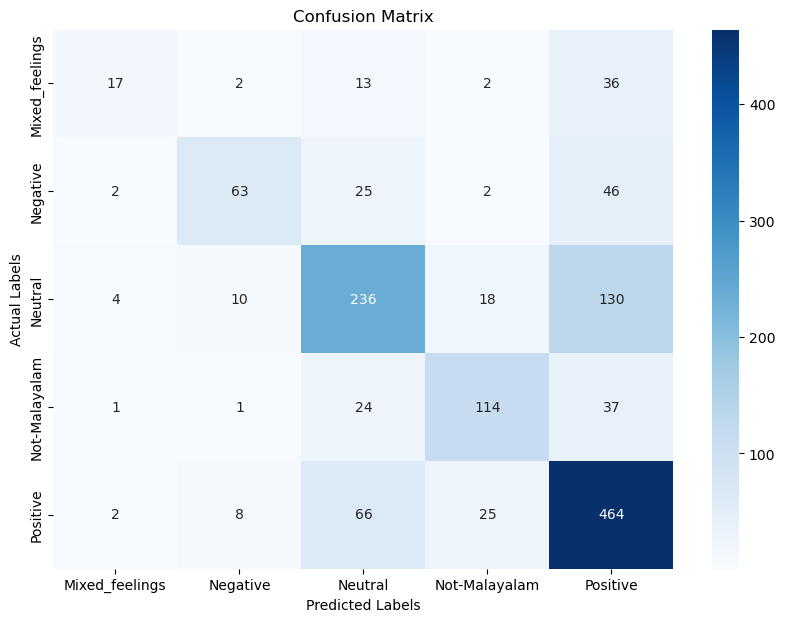

In [8]:
# Predictions and evaluation
predictions = classifier.predict(X_test_tfidf)
print("\n*************************************************")
print("Original Research Results for Logistic Regression")
print("*************************************************\n")
print("Accuracy:", accuracy_score(y_test, predictions))
print("\nClassification Report:\n", classification_report(y_test, predictions))

# Generate the confusion matrix
cm = confusion_matrix(y_test, predictions)
class_names = np.unique(y_test)  # Assuming y_test contains your actual labels

# Plotting the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.ylabel('Actual Labels')
plt.xlabel('Predicted Labels')
plt.show()


*************************************************
Results for Logistic Regression - newly annotated test dataset
*************************************************

Accuracy: 0.615727002967359

Classification Report:
                 precision    recall  f1-score   support

Mixed_feelings       0.54      0.10      0.16       144
      Negative       0.77      0.40      0.53       162
       Neutral       0.55      0.62      0.58       327
 Not-Malayalam       0.34      0.62      0.44        89
      Positive       0.69      0.79      0.74       626

      accuracy                           0.62      1348
     macro avg       0.58      0.50      0.49      1348
  weighted avg       0.63      0.62      0.59      1348



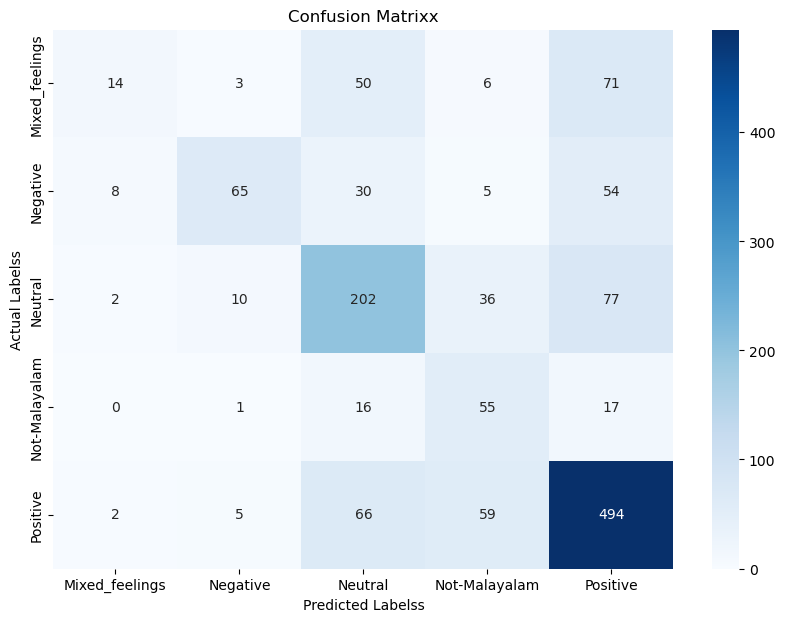

In [9]:
# Predictions and evaluation
new_predictions = classifier.predict(X_new_test_tfidf)
print("\n*************************************************")
print("Results for Logistic Regression - newly annotated test dataset")
print("*************************************************\n")
print("Accuracy:", accuracy_score(y_new_test, new_predictions))
print("\nClassification Report:\n", classification_report(y_new_test, new_predictions, zero_division=1))

# Generate the confusion matrix
new_cm = confusion_matrix(y_new_test, new_predictions)
new_class_names = np.unique(y_new_test)  # Assuming y_test contains your actual labels

# Plotting the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(new_cm, annot=True, fmt="d", cmap="Blues", xticklabels=new_class_names, yticklabels=new_class_names)
plt.title('Confusion Matrixx')
plt.ylabel('Actual Labelss')
plt.xlabel('Predicted Labelss')
plt.show()